# Chapter 12 - recap

## Ordered categorical outcomes

In [12]:
library(devtools)

Loading required package: usethis



In [2]:
data(Trolley)
d <- Trolley

Warning message in data(Trolley):
“data set ‘Trolley’ not found”


ERROR: Error in eval(expr, envir, enclos): object 'Trolley' not found


In [9]:
library(bayesplot)

This is bayesplot version 1.8.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [47]:
head(d)

,case,response,order,id,age,male,edu,action,intention,contact,story,action2
,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<fct>,<int>
1,cfaqu,4,2,96;434,14,0,Middle School,0,0,1,aqu,1
2,cfbur,3,31,96;434,14,0,Middle School,0,0,1,bur,1
3,cfrub,4,16,96;434,14,0,Middle School,0,0,1,rub,1
4,cibox,3,32,96;434,14,0,Middle School,0,1,1,box,1
5,cibur,3,4,96;434,14,0,Middle School,0,1,1,bur,1
6,cispe,3,9,96;434,14,0,Middle School,0,1,1,spe,1


In [48]:
nrow(d)

[1] 9930

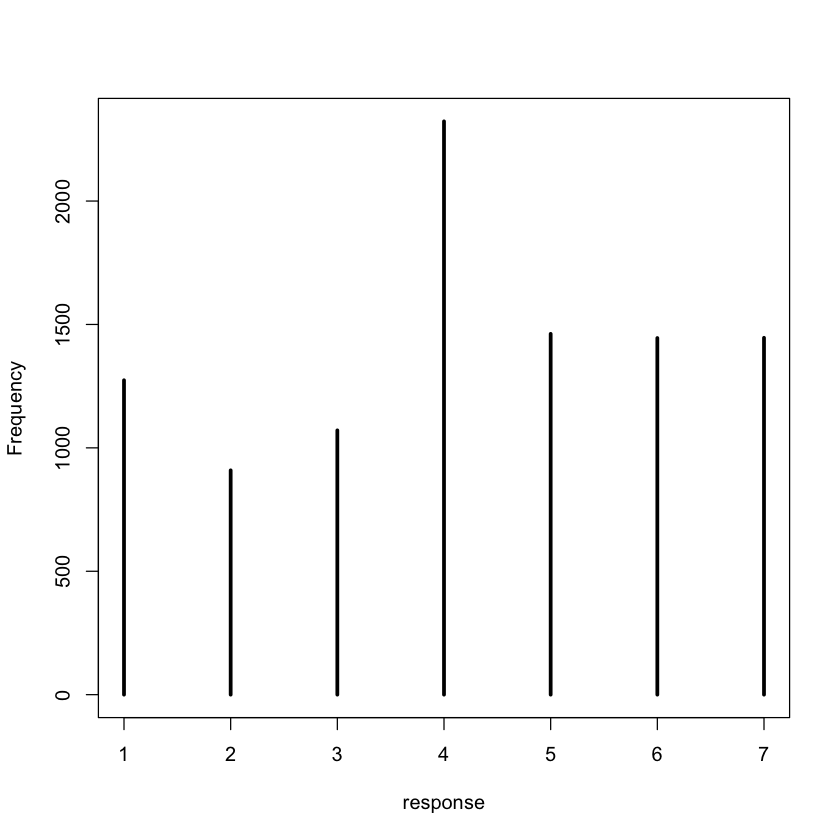

In [4]:
simplehist(d$response, xlim=c(1,7), xlab="response")

In [6]:
pr_k <- table(d$response)/nrow(d)

In [7]:
pr_k


         1          2          3          4          5          6          7 
0.12829809 0.09154079 0.10785498 0.23393756 0.14723061 0.14551863 0.14561934 

In [10]:
table(d$response)


   1    2    3    4    5    6    7 
1274  909 1071 2323 1462 1445 1446 

In [12]:
cum_pr_k <- cumsum(pr_k)

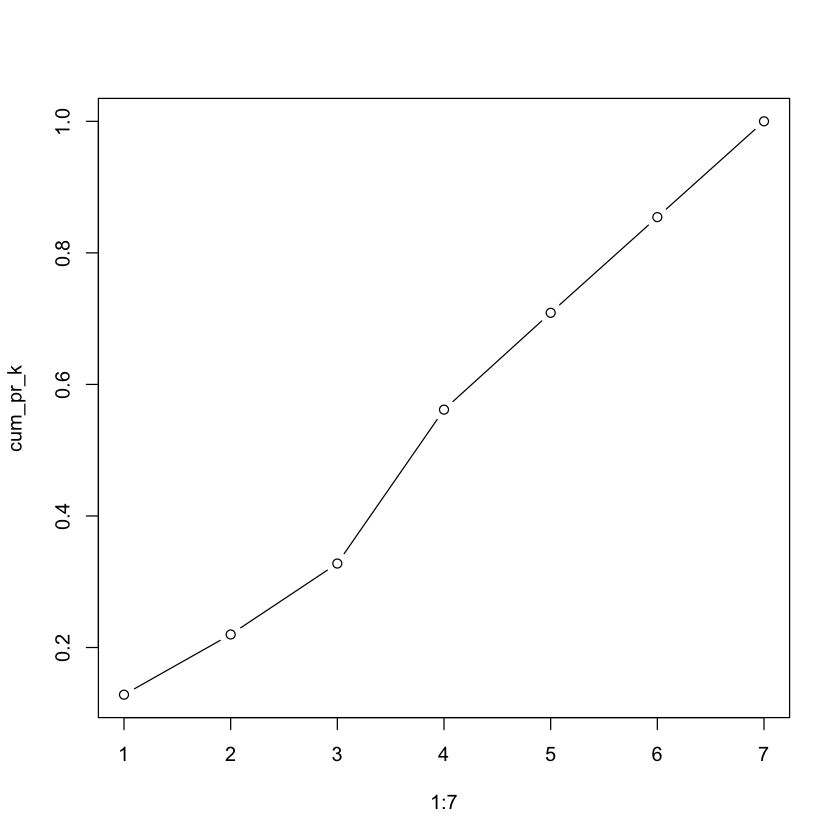

In [15]:
plot(1:7, cum_pr_k, type='b')

In [13]:
round(lco <- logit(cum_pr_k), 2)

1     2     3     4     5     6     7 
-1.92 -1.27 -0.72  0.25  0.89  1.77   Inf

In [14]:
m12.4 <- ulam(
    alist(
        R ~ dordlogit(0, cutpoints),
        cutpoints ~ dnorm(0, 1.5)
    ), data=list(R=d$response), chains=4, cores=4
)

In [16]:
m12.4

Hamiltonian Monte Carlo approximation
2000 samples from 4 chains

Sampling durations (minutes):
        warmup sample total
chain:1   1.97   1.88  3.85
chain:2   2.01   1.97  3.98
chain:3   2.24   1.81  4.05
chain:4   2.06   1.98  4.05

Formula:
R ~ dordlogit(0, cutpoints)
cutpoints ~ dnorm(0, 1.5)

In [17]:
precis(m12.4, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cutpoints[1],-1.9169054,0.03053641,-1.9655714,-1.8684494,1593.916,0.9997808
cutpoints[2],-1.2671300,0.02489899,-1.3074304,-1.2284193,2011.709,0.9998497
cutpoints[3],-0.7191777,0.02190550,-0.7540623,-0.6845199,2337.150,0.9995366
cutpoints[4],0.2478851,0.02062350,0.2152718,0.2809285,2419.776,0.9994430
cutpoints[5],0.8900049,0.02272380,0.8540254,0.9271954,2417.769,0.9989402
cutpoints[6],1.7691459,0.02881807,1.7244708,1.8163499,2349.970,0.9998347


In [18]:
nrow(d)

[1] 9930

In [26]:
round(coef(m12.4), 3)

cutpoints[1] cutpoints[2] cutpoints[3] cutpoints[4] cutpoints[5] cutpoints[6] 
      -1.917       -1.267       -0.719        0.248        0.890        1.769

In [19]:
round(inv_logit(coef(m12.4)), 3)

cutpoints[1] cutpoints[2] cutpoints[3] cutpoints[4] cutpoints[5] cutpoints[6] 
       0.128        0.220        0.328        0.562        0.709        0.854

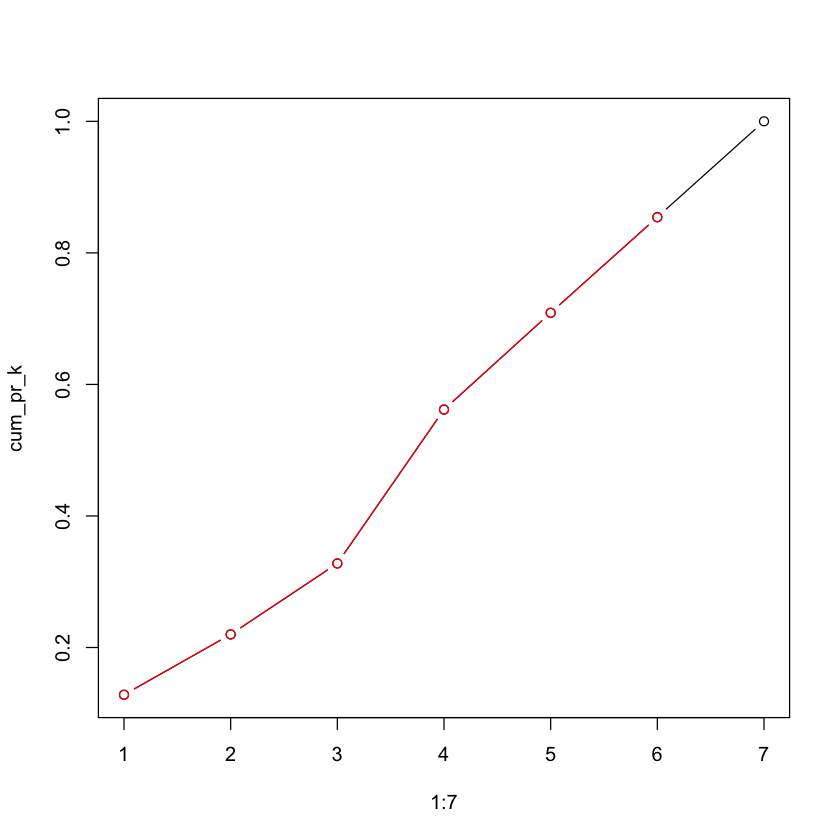

In [24]:
plot(1:7, cum_pr_k, type='b')
lines(1:6,  round(inv_logit(coef(m12.4)), 3), type='b', col='red')

The model just gives back the parameters, as we didn't include any predictor variables. However, now we have a posterior distribution around those parameters, which let us explore their uncertainty.

In [33]:
dat <- list(
    R = d$response,
    A = d$action,
    I = d$intention,
    C = d$contact
)
m12.5 <- ulam(
    alist(
        R ~ dordlogit(phi, cutpoints),
        phi <- bA*A + bC*C + BI*I,
        BI <- bI + bIA*A + bIC*C,
        c(bA, bI, bC, bIA, bIC) ~ dnorm(0, 1.5),
        cutpoints ~ dnorm(0, 1.5)
    ), data=dat, chains=4, cores=4
)

In [44]:
precis(m12.5)

6 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bIC,-1.2705197,0.09671163,-1.4294720,-1.1165205,1168.9553,1.001426
bIA,-0.4512370,0.07982566,-0.5790150,-0.3255995,1161.9538,1.003083
bC,-0.3320313,0.06907345,-0.4403273,-0.2239364,1060.9709,1.001190
bI,-0.2802028,0.05722635,-0.3712077,-0.1869705,969.8977,1.004607
bA,-0.4680810,0.05215257,-0.5539177,-0.3875644,1142.1225,1.003140


6 vector or matrix parameters hidden. Use depth=2 to show them.



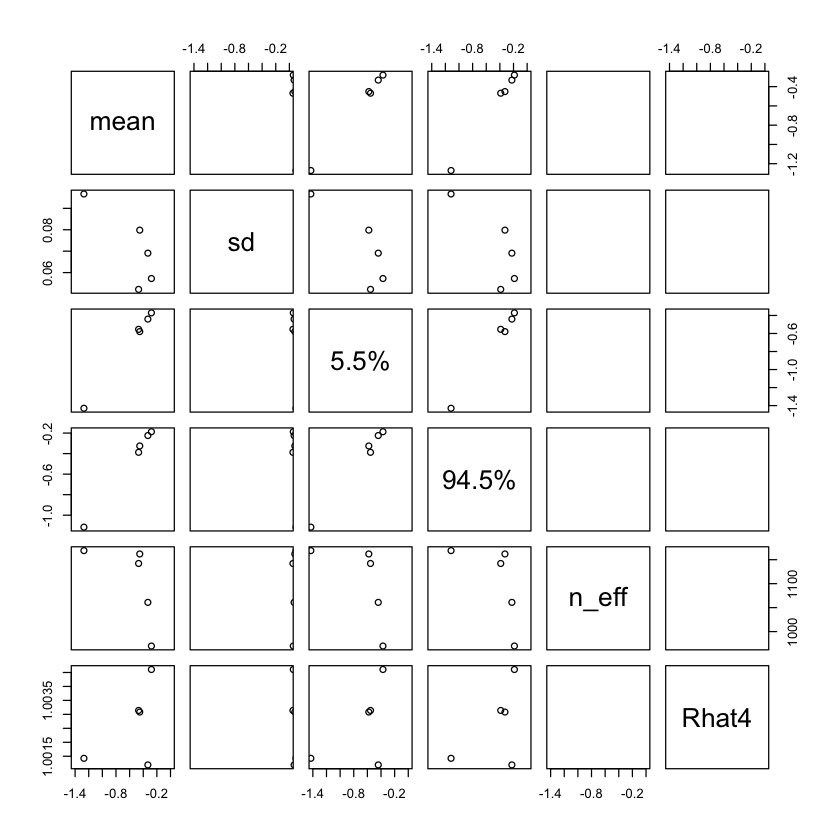

In [45]:
plot(precis(m12.5), xlim=c(-1.4, 0))

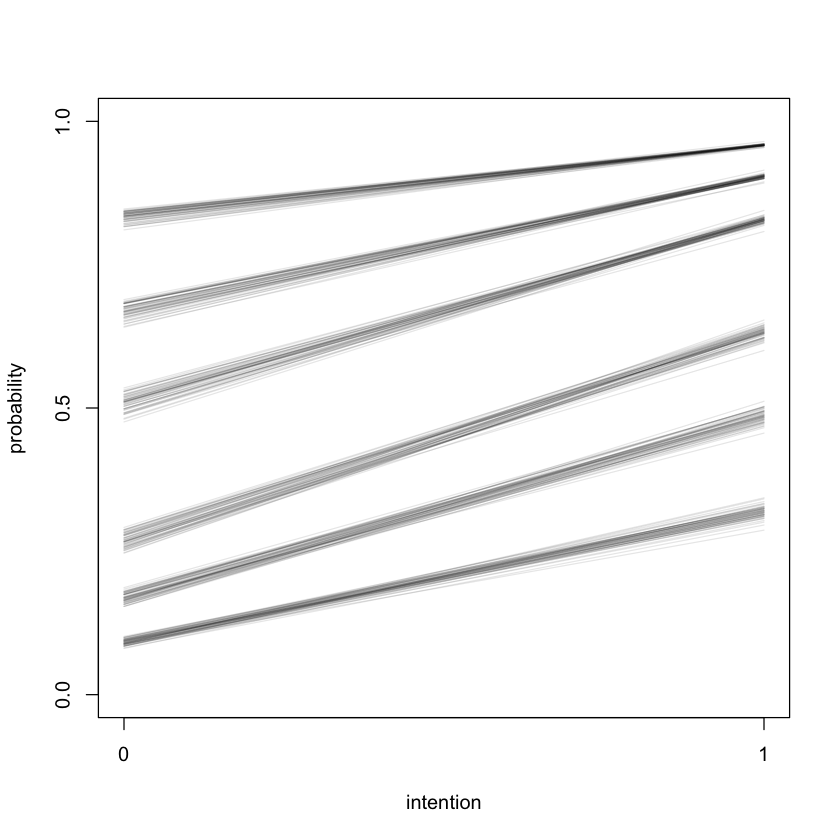

In [53]:
plot(NULL, type='n', xlab="intention", ylab="probability", xlim=c(0,1), ylim=c(0,1), xaxp=c(0,1,1), yaxp=c(0,1,2))
kA <- 0
kC <- 1
kI <- 0:1
pdat <- data.frame(A=kA, C=kC, I=kI)
phi <- link(m12.5, data=pdat)$phi
post <- extract.samples(m12.5)
for(s in 1:50){
    pk <- pordlogit(1:6, phi[s,], post$cutpoints[s,])
    for(i in 1:6) lines(kI, pk[, i], col=grau(0.1))
}

In [54]:
?pordlogit

dordlogit {rethinking},R Documentation
x,Integer values to compute densities or probabilies of
a,Vector of log-odds intercepts
phi,Linear model of log-odds
log,"If TRUE, returns log-probability instead of probability"


In [55]:
library(MASS)

In [56]:
?polr

polr {MASS},R Documentation
formula,"a formula expression as for regression models, of the form response ~ predictors. The response should be a factor (preferably an ordered factor), which will be interpreted as an ordinal response, with levels ordered as in the factor. The model must have an intercept: attempts to remove one will lead to a warning and be ignored. An offset may be used. See the documentation of formula for other details."
data,"an optional data frame, list or environment in which to interpret the variables occurring in formula."
weights,optional case weights in fitting. Default to 1.
start,"initial values for the parameters. This is in the format c(coefficients, zeta): see the Values section."
...,"additional arguments to be passed to optim, most often a control argument."
subset,expression saying which subset of the rows of the data should be used in the fit. All observations are included by default.
na.action,a function to filter missing data.
contrasts,a list of contrasts to be used for some or all of the factors appearing as variables in the model formula.
Hess,logical for whether the Hessian (the observed information matrix) should be returned. Use this if you intend to call summary or vcov on the fit.
model,logical for whether the model matrix should be returned.
